In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# df['Datetime'] = pd.to_datetime(df['Datetime'])
# df['Datetime'] = df['Datetime'].apply(lambda x: x.replace(year = 2007))

# Agent actions from Memory

In [540]:

memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 03\Building-InsuBASE-MassBASE\RL24hAllRNN\agent memory.csv")
# memory_csv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\Building-InsuUP-MassUP\RL04hFlatInput\agent memory.csv")

In [569]:
tmeplist = list(memory_csv[8730:8731]['state_prev'])
tmeplist

['[ 0.58998     0.5899      0.33175     0.81720042 -0.8343907   0.23443042\n -0.99846274  0.8025288   0.52911365  0.20196237 -0.50360191  0.7985099\n  0.52563339  0.23741917 -0.53080702  0.61344898  0.42074344 -0.06586214\n -0.89085412]']

6.75
['[', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ']']
['0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '0', ',', ' ', '1', ',', ' ', '0', ']']
[4.0, 9.0, 6.0, 2.0, 9.0, 2.0, 0.0, 7.0, 0.0, 10.0, 3.0, 7.0, 4.0, 6.0, 6.0, 6.0, 6.0, 1.0, 1.0, 1.0, 1.0, 9.0, 1.0, 1.0, 10.0, 8.0, 1.0, 10.0, 6.0, 8.0, 7.0, 6.0, 0.0, 1.0, 1.0, 8.0, 8.0, 7.0, 7.0, 8.0, 0.0, 0.0, 10.0, 1.0, 7.0, 6.0, 2.0, 6.0, 0.0, 7.0, 6.0, 6.0, 6.0, 4.0, 3.0, 7.0, 4.0, 0.0, 6.0, 9.0, 2.0, 7.0, 4.0, 3.0, 5.0, 7.0, 1.0, 4.0, 5.0, 3.0, 5.0, 5.0, 6.0, 0.0, 7.0, 5.0, 5.0, 5.0, 2.0, 5.0, 6.0, 5.0, 5.0, 1.0, 10.0, 2.0, 1.0, 1.0, 6.0, 7.0, 2.0, 1.0, 3.0, 3.0, 5.0, 10.0, 7.0, 1.0, 1.0, 3.0, 8.0, 3.0, 8.0, 6.0, 3.0, 10.0, 7.0, 8.0, 2.0, 0.0, 1.0, 2.0, 4.0, 10.0, 10.0, 5.0, 5.0, 2.0, 9.0, 2.0, 1.0, 5.0, 5.0, 5.0, 5.0, 0.0, 8.0, 5.0, 5.0, 5.0, 9.0, 10.

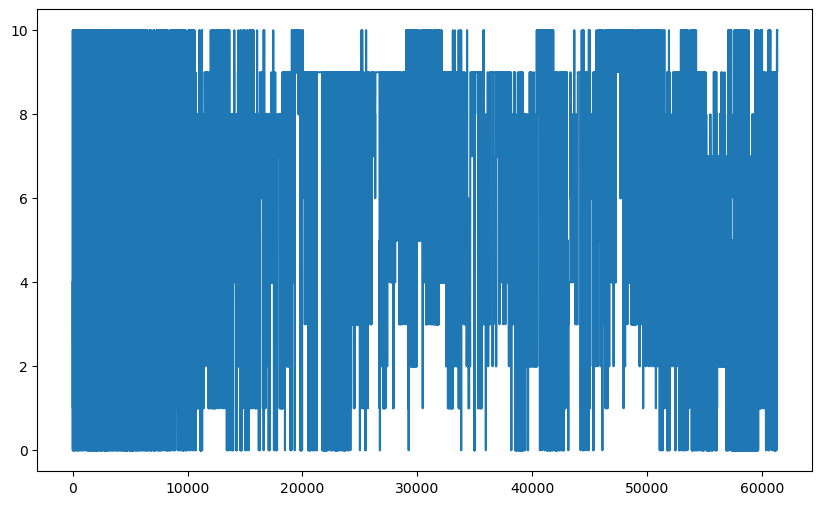

In [542]:
memory_csv.head()
print(list(memory_csv.at[1, 'action'])[1:].index('1') / 4)
print(list(memory_csv.at[1, 'action']))
print(list(memory_csv.at[1, 'action'])[1:])
# print([int(each) for each in list(memory_csv.at[1, 'action']) if int(each).dtype == int])
action_index = [list(memory_csv.at[x, 'action'])[1:].index('1') / 3 for x in range(memory_csv['action'].count())]
print(action_index)
rewards = memory_csv['next_reward'].convert_dtypes()

# y2 = memory_csv['next_reward']
y1 = action_index
x = [x for x in range(len(y1))]

plt.figure(figsize=(10,6))
plt.plot(x,y1)
# plt.plot(x,y2)

# plt.show()

# Agent Loss

In [543]:
lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 03\Building-InsuBASE-MassBASE\RL24hAllRNN\agent loss.csv")
# lossdf = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs\Building-InsuUP-MassUP\RL04hFlatInput\agent loss.csv")

<Axes: >

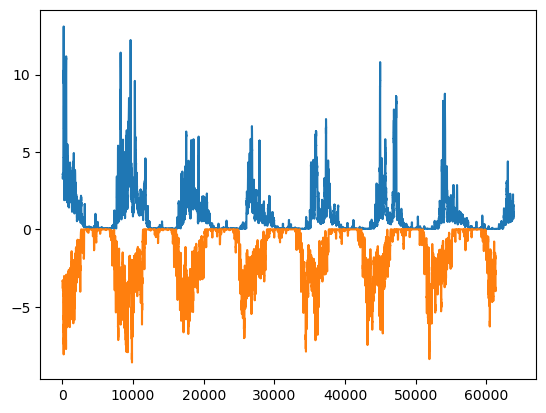

In [544]:
rollloss = lossdf['0'] * 1
rollloss.rolling(50).mean().plot()
memory_csv['next_reward'].rolling(50).mean().plot()
# rollloss.plot()
# rolling(702, min_periods=1, center=True).mean()

# CSV

In [588]:
dfcsvbase = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 03\Building-InsuBASE-MassBASE\EPBaseline\out\eplusout.csv")
dfcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 03\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
dfcsv04rnn = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")


['FACE_0FF19402:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_0FF19402:Surface Heat Storage Energy [J](Hourly)', 'FACE_11065575:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_11065575:Surface Heat Storage Energy [J](Hourly)', 'FACE_18A1FA23:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_18A1FA23:Surface Heat Storage Energy [J](Hourly)', 'FACE_313C9FB7:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_313C9FB7:Surface Heat Storage Energy [J](Hourly)', 'FACE_333BAA5F:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_333BAA5F:Surface Heat Storage Energy [J](Hourly)', 'FACE_6554E6BE:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_6554E6BE:Surface Heat Storage Energy [J](Hourly)', 'FACE_67377BDA:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_67377BDA:Surface Heat Storage Energy [J](Hourly)', 'FACE_AC6A3768:Surface Heat Storage Rate per Area [W/m2](Hourly)', 'FACE_AC6A3768:Surface Heat Storage Energy [J](Hourly)', 'FACE_C

<Axes: >

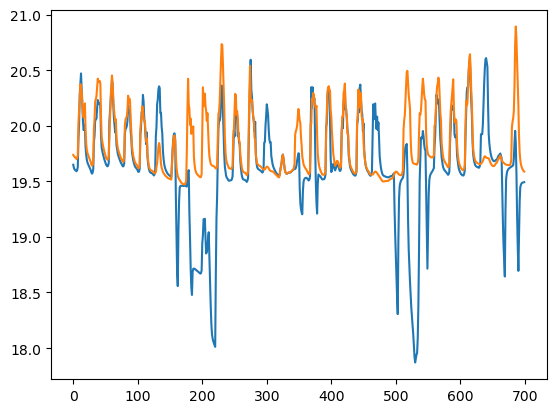

In [592]:
storage = [x for x in list(dfcsv.columns) if 'Storage' in x]
print(storage)
# dfcsv[storage[-2:-1]].plot()
dfcsv['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:700].plot()
# dfcsvbase['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:700].plot()
dfcsv04rnn['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:700].plot()

0     01/01  01:00:00
1     01/01  02:00:00
2     01/01  03:00:00
3     01/01  04:00:00
4     01/01  05:00:00
Name: Date/Time, dtype: object


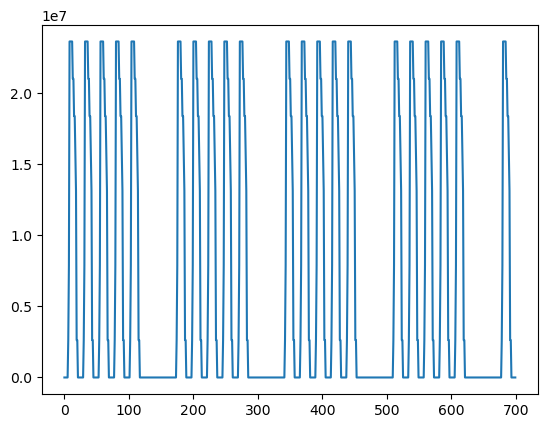

In [491]:
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().plot()

# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().rolling(720).mean().plot()
# dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna().rolling(720).mean().plot()

# newdf = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna() - dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'].dropna()
# dfcsv['Whole Building:Facility Total Purchased Electricity Energy [J](Hourly)'].dropna().plot()
# newdf.plot()
dfcsv['Z1_GROUND_FLOOR:Zone Lights Electricity Energy [J](Hourly)'][:700].plot()
print(dfcsv['Date/Time'].head())
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'][0:600].plot()
# dfcsv['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][720:1000].plot()

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'

# 'Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly)'



<Axes: >

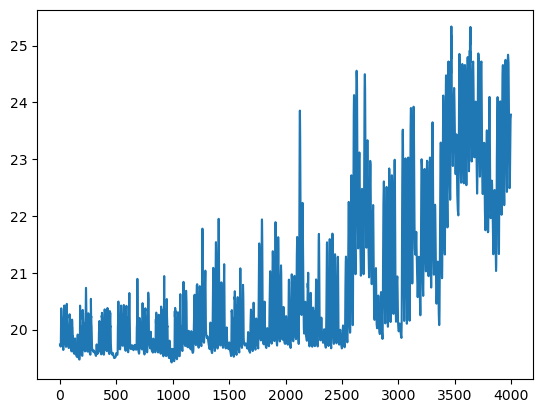

In [495]:
dfcsv['Z1_GROUND_FLOOR:Zone Operative Temperature [C](Hourly)'][:4000].plot()
# dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'][:720].plot()
# dfcsv['Z1_GROUND_FLOOR:Zone Mean Air Temperature [C](Hourly)'].plot()
# dfcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'].plot()

In [14]:
totalmj = float(MJ_m2) * 2480
totaljoules = totalmj * 1000000

z1sum = dfcsv['Z1_GROUND_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().sum()
z2sum = dfcsv['Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Supply Air Total Heating Energy [J](Hourly)'].dropna().sum()

print(totalmj)
print(totaljoules)
print(z1sum)
print(z2sum)
print((z2sum + z1sum) / 1000000000, '  total')

print('\nsame as above, for ease')
print(MJ_m2)
print(EUI_kWh_m2)


280686.4
280686400000.0
39437110929.03003
13518462974.72491
52.955573903754946   total

same as above, for ease
113.18
31.438880086000005


# Meter CSV

In [594]:
dfmeter = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusmtr.csv")
dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\EPBaseline\out\eplusmtr.csv")
dfmeter = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusmtr.csv")


48.47442150203958
5.429917053736531


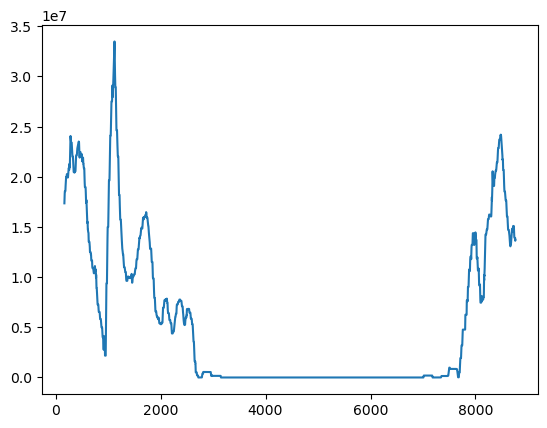

In [595]:
dfmeter['DistrictHeating:Facility [J](TimeStep)'].rolling(168).mean().plot()
heat_GJ_total = dfmeter['DistrictHeating:Facility [J](TimeStep)'].sum() / 1_000_000_000
heat_kWh_m2 = heat_GJ_total * 277.8 / 2480

print(heat_GJ_total)
print(heat_kWh_m2)

48.47442150203958

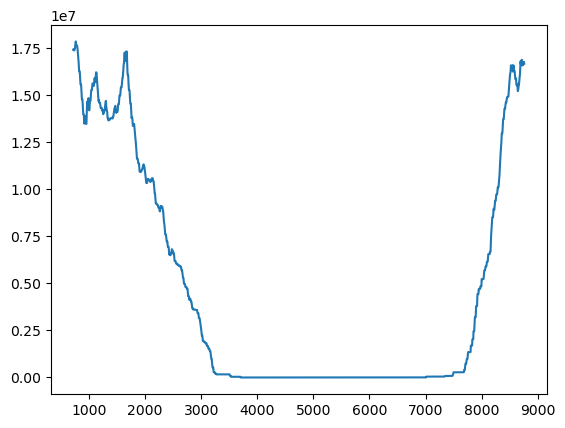

In [262]:
dfmeter['DistrictHeating:Facility [J](TimeStep)'].rolling(720).mean().plot()
dfmeter['DistrictHeating:Facility [J](TimeStep)'].sum() / 1_000_000_000

In [17]:
import matplotlib.pyplot as plt

# x1 = [2,4,6,8]
# x2 = [3,5,7,9]
# x = [x for x in range(72)]
# y2 = output_df["DistrictHeating:Facility [J](TimeStep)"]
# y2=y4
# y2 = y2.rolling(702, min_periods=1, center=True).mean()

y1 = df["electricity_facility"]
y2 = df["electricity_heating"]
y2 = y2.rolling(24, min_periods=1, center=True).mean()
x = [x for x in range(y2.count())]

plt.figure(figsize=(10,6))
# plt.plot(x,y1)
plt.plot(x,y2)
# plt.plot(x,y3)
# plt.plot(x,y4)
# plt.plot(x, list(reversed(booleanlist_school_active)))

plt.show()

NameError: name 'df' is not defined

# HTM heating extraction

In [3]:
htm_file = pd.read_html(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplustbl.htm")
# MJ_m2 = myhtm['Annual_Building_Utility_Performance_Summary_for_Entire_Facility']['Site and Source Energy'].iat[0,1]
MJ_m2 = htm_file[0][2][1]
EUI_kWh_m2 = float(MJ_m2) * 0.2777777 #conversion from MJ to kWh
print(MJ_m2)
print(EUI_kWh_m2)

113.18
31.438880086000005


In [15]:
htm_file = pd.read_html(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplustbl.htm")
assert htm_file[4][13][0] == 'District Heating [GJ]', 'Wrong column from .HTM file'
heat_GJ_total = float(htm_file[4][13][1]) #GJ total building 1 year
building_area_m2 = 2480
heat_kWh_m2 = heat_GJ_total * 277.8 / building_area_m2

print(heat_kWh_m2, ' kWh/m2/a for heating')

5.932374193548387  kWh/m2/a for heating


# Temperature outside range

In [424]:
# dfoutcsv = pd.read_csv(r"C:\Users\sebas\Documents\GitHub\ClimAIte\out\eplusout.csv") #, parse_dates=['Date/Time'])
dfoutcsv = pd.read_csv(r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 02\Building-InsuBASE-MassBASE\RL24hAllRNN\out\eplusout.csv")
# dfoutcsv['Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly)']#.dropna().plot()
# dfoutcsv['Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)']#.dropna().plot()

In [545]:
# creating range sequence of dates
name = 'BaselineEP 43543'
if name == 'BaselineEP':
    dates = pd.date_range('2007-01-01', periods=8760, freq='H')
else:
    dates = pd.date_range('2014-01-01', periods=8760, freq='H')

#creating pandas Series with date index
s = pd.Series(dates)
dfoutcsv['Date/Time'] = s
# dfoutcsv
# s.dt.dayofweek[20:30] # 0-6 Mon-Sun
# dfoutcsv['Date/Time'].dt.dayofweek

count_too_cold = dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
               (dfoutcsv['Date/Time'].dt.dayofweek < 5) &
               (dfoutcsv['Date/Time'].dt.hour.between(8, 15, inclusive='both'))
               ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']

print(count_too_cold)

light_on_weekend = dfoutcsv[(dfoutcsv['Z2_FIRST_FLOOR:Zone Lights Electricity Energy [J](Hourly)'] > 0) &
               (dfoutcsv['Date/Time'].dt.dayofweek == 5) 
               ].count()['Date/Time']
print(light_on_weekend)

498
780


In [546]:
dfoutcsv['weekday'] = dfoutcsv['Date/Time'].dt.dayofweek
# dfoutcsv.head()
# dfoutcsv['Date/Time'].dt.dayofweek

In [547]:
dfoutcsv.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Z1_GROUND_FLOOR:Zone People Total Heating Energy [J](Hourly),Z2_FIRST_FLOOR:Zone People Total Heating Energy [J](Hourly),Z1_GROUND_FLOOR:Zone Lights Electricity Energy [J](Hourly),Z2_FIRST_FLOOR:Zone Lights Electricity Energy [J](Hourly),Z1_GROUND_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly),Z2_FIRST_FLOOR:Zone Electric Equipment Electricity Energy [J](Hourly),Z1_GROUND_FLOOR:Zone Mean Radiant Temperature [C](Hourly),Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly),...,Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Heating Energy [J](Hourly),Z2_FIRST_FLOOR IDEAL LOADS AIR SYSTEM:Zone Ideal Loads Zone Total Cooling Energy [J](Hourly),SERVICEHOTWATER_C832CB16..Z2_FIRST_FLOOR:Water Use Equipment Heating Energy [J](Hourly),SERVICEHOTWATER_C832CB16..Z1_GROUND_FLOOR:Water Use Equipment Heating Energy [J](Hourly),SHW WATERHEATER1:Water Heater Electricity Energy [J](Hourly),SHW PUMP1:Pump Electricity Energy [J](Hourly),Electricity:Facility [J](TimeStep),DistrictCooling:Facility [J](TimeStep),DistrictHeating:Facility [J](TimeStep),weekday
0,2007-01-01 00:00:00,3.7,0.0,0.0,0.0,0.0,0.0,0.0,19.247836,19.188954,...,6.068199e+06,0.000000e+00,0.0,0.0,0.000000,0.0,72000.000000,0.0,2.200464e+07,0
1,2007-01-01 01:00:00,3.6,0.0,0.0,0.0,0.0,0.0,0.0,19.149159,19.072734,...,7.134712e+06,1.637090e-09,0.0,0.0,373887.936118,0.0,445880.832247,0.0,2.675933e+07,0
2,2007-01-01 02:00:00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,19.089941,19.005655,...,7.915496e+06,1.637090e-09,0.0,0.0,0.000000,0.0,72000.000000,0.0,2.895100e+07,0
3,2007-01-01 03:00:00,4.2,0.0,0.0,0.0,0.0,0.0,0.0,19.051606,18.963944,...,1.079270e+07,0.000000e+00,0.0,0.0,0.000000,0.0,72000.000000,0.0,3.787104e+07,0
4,2007-01-01 04:00:00,4.2,0.0,0.0,0.0,0.0,0.0,0.0,19.022335,18.932879,...,1.358858e+07,3.274181e-09,0.0,0.0,0.000000,0.0,72000.000000,0.0,4.809901e+07,0


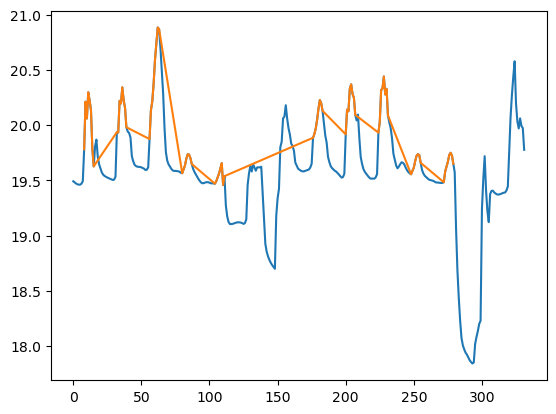

In [548]:
import matplotlib.pyplot as plt
# import numpy as np
dfshort = dfoutcsv[168:500]
rangework = pd.DataFrame(dfshort[(dfshort['Date/Time'].dt.dayofweek < 5) &
               (dfshort['Date/Time'].dt.hour.between(8, 15, inclusive='both'))
               ])   #.count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'])
rangework.iloc[:, [0]]

x = [x for x in range(dfshort['Date/Time'].count())]
y = dfshort['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
x2 = rangework.index - 168
y2 = rangework['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
plt.plot(x, y)
plt.plot(x2, y2)
# plt.Color(0.1, 0.2, 0.5)
# plt.legend(loc='best')
plt.show()

# rangework

<Axes: >

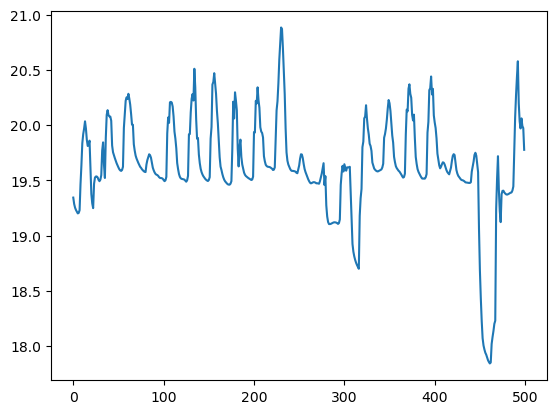

In [549]:
# dfoutcsv['Z2_FIRST_FLOOR:Zone Mean Radiant Temperature [C](Hourly)'][0:500].plot()
# dfoutcsv['Z2_FIRST_FLOOR:Zone Air Temperature [C](TimeStep)'][0:500].plot()
# dfoutcsv['Z2_FIRST_FLOOR:Zone Mean Air Temperature [C](Hourly)'][0:500].plot()
dfoutcsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'][0:500].plot()

# Make Dataframe like report

In [550]:
base_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs"
availablelist = [x for x in os.listdir(base_path) if 'ing-Insu' in x]
print(availablelist)

['Building-InsuBASE-MassBASE', 'Building-InsuBASE-MassDW', 'Building-InsuBASE-MassUP', 'Building-InsuDW-MassBASE', 'Building-InsuDW-MassDW', 'Building-InsuDW-MassUP', 'Building-InsuUP-MassBASE', 'Building-InsuUP-MassDW', 'Building-InsuUP-MassUP']


In [559]:
import pandas as pd
import os

column_name = ['Building type name',
               'Insulation',
               'Thermal Mass'
               #'Weather Location'
               #'Baseline EnergyPlus Heating [kWh/m2/a]', #from htm
               #'Baseline EnergyPlus too warm % time > 25C', #from out csv
               #'Baseline EnergyPlus too cold % time < 20C']
]

base_path = r"W:\Insync\GDrive\Main\TU Delft\Thesis\DRL runs 04"
# EPBaseline', 'RLBaseNoForesight', 'RL24hAllRNN', 'RL24hNoSolarRNN', 'RL04hAllRNN', 'RL04hNoSolarRNN', 'RL04hFlatInput'
control_types_list = ['EPBaseline', 'RLBaseNoForesight', 'RL24hAllRNN', 'RL04hAllRNN', 'RL24hNoSolarRNN', 'RL04hNoSolarRNN', 'RL04hFlatInput']
control_pretty_names_list = ['Baseline EnergyPlus simple schedule', 'RL No Foresight', 'RL 24h Foresight RNN', 'RL 4h Foresight RNN', 'RL 24h Foresight RNN w/o Solar', 'RL 4h Foresight RNN w/o Solar', 'RL 4h Foresight flat inputs']

for name in control_pretty_names_list:
    column_name.append(f'{name} Heating [kWh/m2/a]')
    column_name.append(f'{name} too cold % time < 20C')
    column_name.append(f'{name} too warm % time > 25C')


building_types_list = [ 'Building-InsuBASE-MassBASE']#,
                        # 'Building-InsuBASE-MassDW',
                        # 'Building-InsuBASE-MassUP',
                        # 'Building-InsuDW-MassBASE',
                        # 'Building-InsuDW-MassDW',
                        # 'Building-InsuDW-MassUP',
                        # 'Building-InsuUP-MassBASE',
                        # 'Building-InsuUP-MassDW',
                        # 'Building-InsuUP-MassUP']


building_area_m2 = 2480

rows_combined = []
for builidng_no, unique_building_name in enumerate(building_types_list):
    
    row_in_df = []
    row_in_df.append(unique_building_name)

    if unique_building_name[13] == 'B':
        row_in_df.append('Baseline')
    elif unique_building_name[13] == 'D':
        row_in_df.append('Decreased 50%')
    elif unique_building_name[13] == 'U':
        row_in_df.append('Increased 2x')
    
    if unique_building_name[-1] == 'E':
        row_in_df.append('Baseline')
    elif unique_building_name[-1] == 'W':
        row_in_df.append('Decreased 50%')
    elif unique_building_name[-1] == 'P':
        row_in_df.append('Increased 2x')

    for control_no, unique_control in enumerate(control_types_list):
        htm_path = os.path.join(base_path, unique_building_name, unique_control, 'out', 'eplustbl.htm')
        epluscsv_path = os.path.join(base_path, unique_building_name, unique_control, 'out', 'eplusout.csv')
        meter_path = os.path.join(base_path, unique_building_name, unique_control, 'out', 'eplusmtr.csv')

        dfmeter = pd.read_csv(meter_path)
        heat_GJ_total = dfmeter['DistrictHeating:Facility [J](TimeStep)'].sum() / 1_000_000_000

        # htm_file = pd.read_html(htm_path)
        # assert htm_file[4][13][0] == 'District Heating [GJ]', 'Wrong column/table from .HTM file'
        # heat_GJ_total = float(htm_file[4][13][1]) #GJ total building 1 year

        heat_kWh_m2 = heat_GJ_total * 277.8 / building_area_m2

        row_in_df.append(heat_kWh_m2)
        print(heat_kWh_m2, ' kWh/m2/a for heating')

        # CSV for temperature ranges
        epluscsv = pd.read_csv(epluscsv_path)

        if unique_control == 'EPBaseline':
            dates = pd.date_range('2007-01-01', periods=8760, freq='H')
        else:
            dates = pd.date_range('2014-01-01', periods=8760, freq='H')

        #creating pandas Series with date index
        s = pd.Series(dates)
        epluscsv['Date/Time'] = s # s.dt.dayofweek # 0-6 Mon-Sun

        count_too_cold = epluscsv[(epluscsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] < 20) &
                    (epluscsv['Date/Time'].dt.dayofweek < 5) &
                    (epluscsv['Date/Time'].dt.hour.between(8, 15, inclusive='both'))
                    ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
        row_in_df.append(count_too_cold)
        print(count_too_cold, ' days too cold')

        count_too_warm = epluscsv[(epluscsv['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)'] > 25) &
                    (epluscsv['Date/Time'].dt.dayofweek < 5) &
                    (epluscsv['Date/Time'].dt.hour.between(8, 15, inclusive='both'))
                    ].count()['Z2_FIRST_FLOOR:Zone Operative Temperature [C](Hourly)']
        row_in_df.append(count_too_warm)
        print(count_too_warm, ' days too warm')


    rows_combined.append(row_in_df)

print(rows_combined)

8.198494026189948  kWh/m2/a for heating
107  days too cold
95  days too warm
7.325573928156664  kWh/m2/a for heating
367  days too cold
70  days too warm
7.5812868016944845  kWh/m2/a for heating
370  days too cold
71  days too warm
7.329083485858352  kWh/m2/a for heating
372  days too cold
70  days too warm
7.32518103189138  kWh/m2/a for heating
394  days too cold
70  days too warm
7.264799380832395  kWh/m2/a for heating
467  days too cold
70  days too warm
7.6090637286088665  kWh/m2/a for heating
361  days too cold
71  days too warm
[['Building-InsuBASE-MassBASE', 'Baseline', 'Baseline', 8.198494026189948, 107, 95, 7.325573928156664, 367, 70, 7.5812868016944845, 370, 71, 7.329083485858352, 372, 70, 7.32518103189138, 394, 70, 7.264799380832395, 467, 70, 7.6090637286088665, 361, 71]]


In [560]:
df = pd.DataFrame(rows_combined, columns=column_name)
df

,Building type name,Insulation,Thermal Mass,Baseline EnergyPlus simple schedule Heating [kWh/m2/a],Baseline EnergyPlus simple schedule too cold % time < 20C,Baseline EnergyPlus simple schedule too warm % time > 25C,RL No Foresight Heating [kWh/m2/a],RL No Foresight too cold % time < 20C,RL No Foresight too warm % time > 25C,RL 24h Foresight RNN Heating [kWh/m2/a],...,RL 4h Foresight RNN too warm % time > 25C,RL 24h Foresight RNN w/o Solar Heating [kWh/m2/a],RL 24h Foresight RNN w/o Solar too cold % time < 20C,RL 24h Foresight RNN w/o Solar too warm % time > 25C,RL 4h Foresight RNN w/o Solar Heating [kWh/m2/a],RL 4h Foresight RNN w/o Solar too cold % time < 20C,RL 4h Foresight RNN w/o Solar too warm % time > 25C,RL 4h Foresight flat inputs Heating [kWh/m2/a],RL 4h Foresight flat inputs too cold % time < 20C,RL 4h Foresight flat inputs too warm % time > 25C
0,Building-InsuBASE-MassBASE,Baseline,Baseline,8.198494,107,95,7.325574,367,70,7.581287,...,70,7.325181,394,70,7.264799,467,70,7.609064,361,71


Improvement notes.

In emspy, use Operative Temperature instead of Air temperature.
Further tests, train for longer. Larger NN. Even more replay memory, daily perhaps after samples >4000.
Train until 2010 or 2011? nope
Change reward to 10x temperature priority.

Smaller hidden network size but one more layer? Down to 100, most sources say not bigger than in/output layer. Deeper networks are necessary for non-linear cases. So perhaps slightly deeper is better.


Updates for Version 2
Network hidden layers from 400,400,400 to 80 x 5
Daily experience replay at 23:00, instead of only on Sundays
Using Zone Operative Temperature instead of Air Temperature
Reward change, heating is /10 less important, in order to prioritize comfort.

Updates for Version 3
Train for 7 years instead of 3 years. (2007-2014)
Change activation function from Relu to Gelu
Epsilon exploration, from first 7000 to 12000 hours. Also, the random int increased from 12000 to 20000.
Adjust reward minimum to 20.5 self.work_hours_heating_setpoint to nudge it, make elec divisor 7

        

Additional inputs:

Input additional info for state. Air temp, radiant temp, humidity, electricity, people heating, solar window gain, weekday, weekend boolean, time of day, heat storage, 


Output:Variable,*,Surface Heat Storage Rate per Area,hourly; !- Zone Average [W/m2]
Output:Variable,*,Surface Heat Storage Energy,hourly; !- Zone Sum [J]

Set up custom DF output, either from BCA or manual list
Investigate custom DF outputs for dates in multiyear simulation


# Make graphs like lit research in report

In [561]:
# x-axis is control: Insulation (and mass for dampening)
# y-axis is potential: Mass and solar
# Size of spheres is relation to saving from baseline.
# There can be one graph for each RL compared to either of the 2 baselines.

In [562]:
# Graph or calculate improvement % from baseline
list_of_heat = [x for x in column_name if 'kWh' in x]
print(list_of_heat)
base = list_of_heat[0]
the_rest = list_of_heat[1:]
print(the_rest)
df_improvement = df.copy(deep=True)

for each in the_rest:
    each_red = each[:-11]
    df_improvement[f'{each_red} % saving'] = (df_improvement[f'{base}'] - df_improvement[f'{each}']) / df_improvement[f'{base}']

['Baseline EnergyPlus simple schedule Heating [kWh/m2/a]', 'RL No Foresight Heating [kWh/m2/a]', 'RL 24h Foresight RNN Heating [kWh/m2/a]', 'RL 4h Foresight RNN Heating [kWh/m2/a]', 'RL 24h Foresight RNN w/o Solar Heating [kWh/m2/a]', 'RL 4h Foresight RNN w/o Solar Heating [kWh/m2/a]', 'RL 4h Foresight flat inputs Heating [kWh/m2/a]']
['RL No Foresight Heating [kWh/m2/a]', 'RL 24h Foresight RNN Heating [kWh/m2/a]', 'RL 4h Foresight RNN Heating [kWh/m2/a]', 'RL 24h Foresight RNN w/o Solar Heating [kWh/m2/a]', 'RL 4h Foresight RNN w/o Solar Heating [kWh/m2/a]', 'RL 4h Foresight flat inputs Heating [kWh/m2/a]']


In [563]:
# create grid
list_of_saving = [x for x in df_improvement.columns if 'saving' in x]
mini_columns = ['Insulation','Thermal Mass'] + list_of_saving
df_mini = df_improvement[mini_columns]
df_mini['Insulation'] = df_mini['Insulation'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])
df_mini['Thermal Mass'] = df_mini['Thermal Mass'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])
df_mini

C:\Users\sebas\AppData\Local\Temp\ipykernel_14496\3121592374.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['Insulation'] = df_mini['Insulation'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])
C:\Users\sebas\AppData\Local\Temp\ipykernel_14496\3121592374.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mini['Thermal Mass'] = df_mini['Thermal Mass'].replace(['Baseline', 'Decreased 50%', 'Increased 2x'],[1, 0.5, 2])


,Insulation,Thermal Mass,RL No Foresight Heating % saving,RL 24h Foresight RNN Heating % saving,RL 4h Foresight RNN Heating % saving,RL 24h Foresight RNN w/o Solar Heating % saving,RL 4h Foresight RNN w/o Solar Heating % saving,RL 4h Foresight flat inputs Heating % saving
0,1,1,0.106473,0.075283,0.106045,0.106521,0.113886,0.071895


<Axes: >

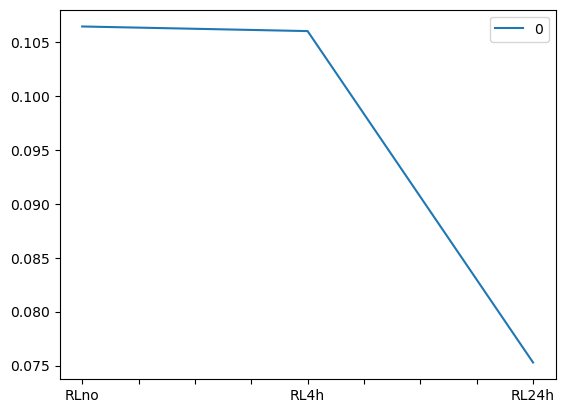

In [564]:
newlist = []
for row in range(df['Insulation'].count()):
    rowlist = []
    for control in list_of_saving:
        rowlist.append(df_mini.iloc[row][control])
    # rowlist = rowlist[0] + rowlist[2] + rowlist[1]
    newlist.append(rowlist)
dert = pd.DataFrame(newlist)
dertorg = pd.DataFrame()
dertorg['RLno'] = dert[0]
dertorg['RL4h'] = dert[2]
dertorg['RL24h'] = dert[1]
dertorg.T.plot()

In [565]:
dert

,0,1,2,3,4,5
0,0.106473,0.075283,0.106045,0.106521,0.113886,0.071895


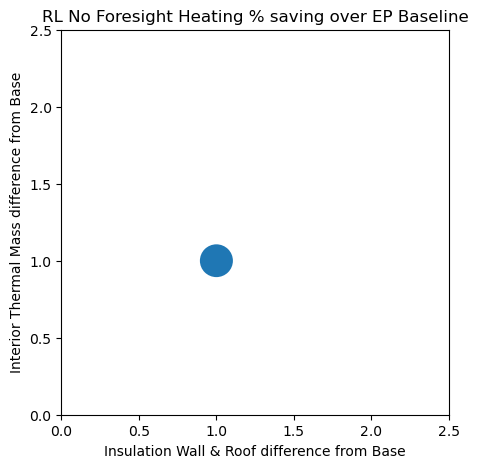

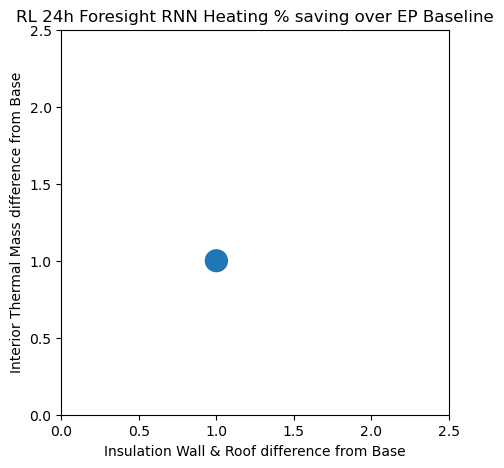

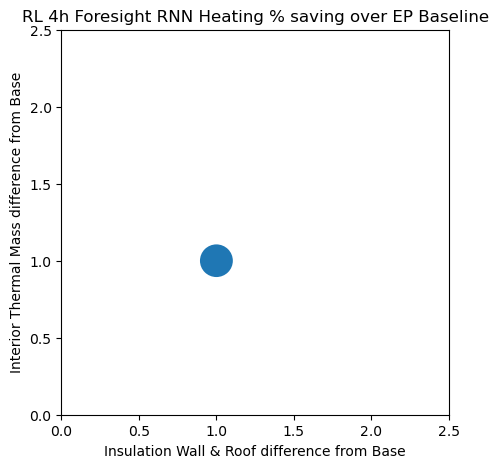

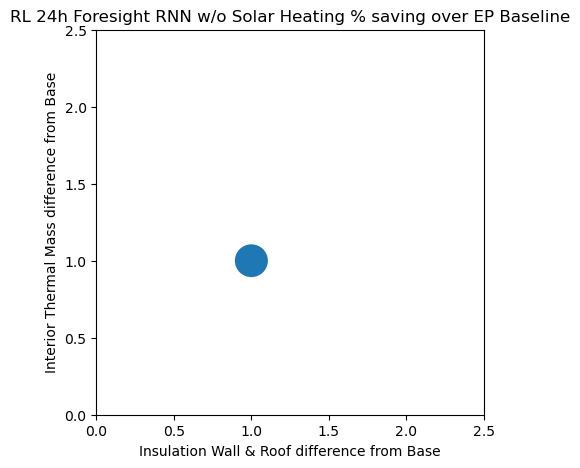

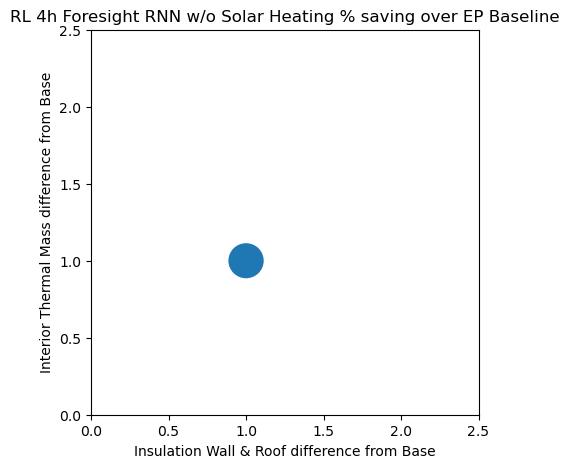

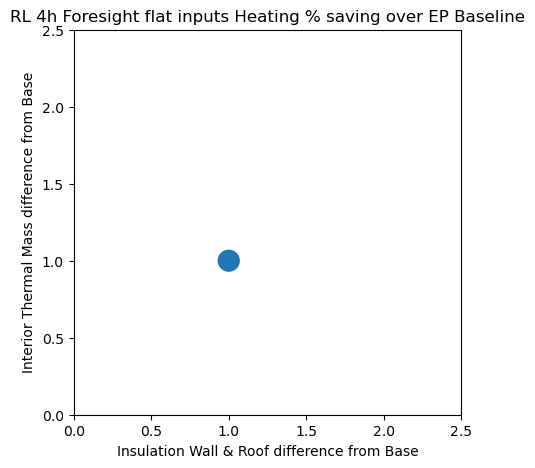

In [566]:
import matplotlib.pyplot as plt

for control in list_of_saving:
    circle_list = []
    fig, ax = plt.subplots(figsize=(5,5))
    # plt.figure(figsize=(10,10))
    plt.xlim([0,2.5])
    plt.ylim([0,2.5])
    plt.title(f'{control} over EP Baseline')
    plt.xlabel('Insulation Wall & Roof difference from Base')
    plt.ylabel('Interior Thermal Mass difference from Base')
    for row in range(df_mini['Insulation'].count()):
        circle = plt.Circle((df_mini.iloc[row]['Insulation'], df_mini.iloc[row]['Thermal Mass']), df_mini.iloc[row][control])
        ax.add_patch(circle)
        # circle_list.append(circle)


### Investigate week by week saving for networks. Using HVAC total energy or Meter energy as previously above. This may reveal which season has best savings.
Graph of week by week savings

### Make histograms of temperatures indoors